# Diagnóstico Inicial da Evasão - UFRB

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/ze_final.csv')

In [2]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name): 
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

In [3]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))


df.loc[idx, 'centro'].value_counts(normalize=True)*100

CCAAB     29.673519
CAHL      21.054414
CFP       18.060459
CETEC     17.049577
CCS        9.180169
CETENS     3.008464
CECULT     1.973398
Name: centro, dtype: float64

# Perfil dos Estudantes na Amostra

- 60% evadiram
- 80% possuem cidade de origem diferente da cidade do campus
- 55% são do sexo feminino
- Idade média dos estudantes é 25
- Há 20675 números de matrículas

In [4]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())

print(df.matricula.nunique())

1    0.596034
0    0.403966
Name: event, dtype: float64
1    0.807739
0    0.192261
Name: is_outra_cidade, dtype: float64
0    0.548392
1    0.451608
Name: sexo, dtype: float64
24.693494558645707
20675


# Q.1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- Sim. Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (60% vs 57%)
- A diferença é estatisticamente significativa

   is_outra_cidade  event    percent
0                0      1  57.710692
1                0      0  42.289308
2                1      1  60.053892
3                1      0  39.946108


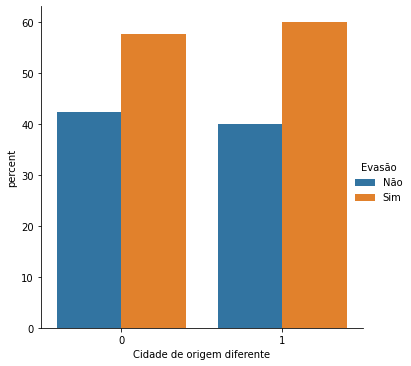

In [5]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [6]:
print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.005
0.006812750149063356


# Q.2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 2o semestre (67% vs 54%)
- A diferença é estatisticamente significativa

1    0.57925
2    0.42075
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  54.450568
1                 1      0  45.549432
2                 2      1  66.697322
3                 2      0  33.302678


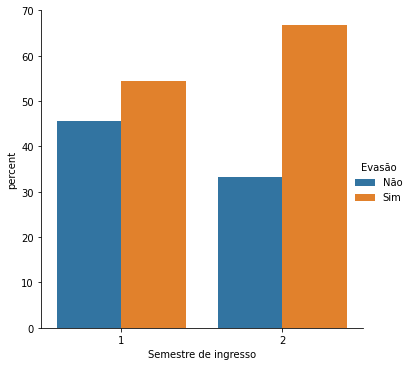

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [8]:
print('%.3f'%(proportion_test(df, 'semestreIngresso')))
print(proportion_test2(df, 'semestreIngresso'))

0.000
3.1211884241700796e-70


# Q.3 Em termos gerais, a taxa de evasão é maior no 1o semestre ou 2o semestre do ano letivo? Independentemente do semestre de ingresso do estudante


- Taxa de Evasão é maior no 2o semestre letivo (66% vs 53%). Por quê? O SISU pode ser uma linha de investigação.
- A diferença é estatiscamente significativa

2    0.505151
1    0.494849
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  52.770990
1               1      0  47.229010
2               2      1  66.296438
3               2      0  33.703562


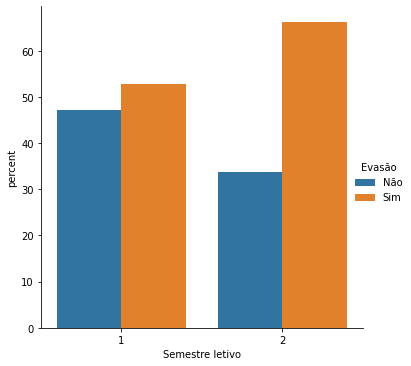

In [9]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre letivo')

In [10]:
print('%.3f'%(proportion_test(df, 'semestreLetivo')))
print(proportion_test2(df, 'semestreLetivo'))

0.000
2.1716585380314526e-87


# Q.4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (64% vs 56%).
- A diferença é estatisticamente significativa.

0    0.548392
1    0.451608
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  56.376786
1     0      0  43.623214
2     1      1  63.521474
3     1      0  36.478526


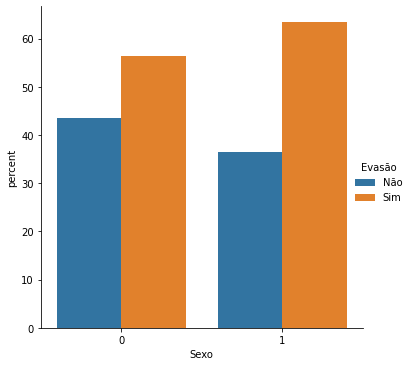

In [11]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

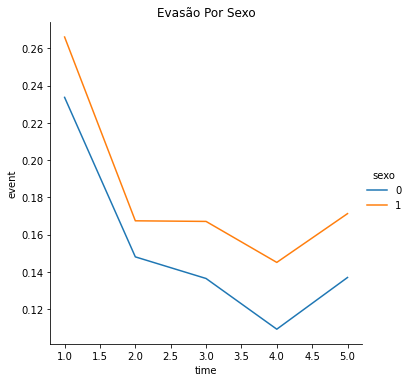

In [12]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [13]:
print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

0.000
2.0315865139477238e-25


# Q.5 Taxa de evasão decresce com o tempo?

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

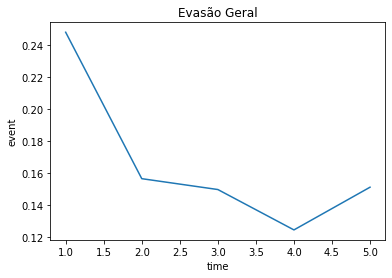

In [14]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q.6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- Taxa de evasão é maior em ampla concorrência (61% vs 59%)
- A diferença é estatisticamente significativa.

0    0.519033
1    0.480967
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  60.618768
1           0      0  39.381232
2           1      1  58.507643
3           1      0  41.492357


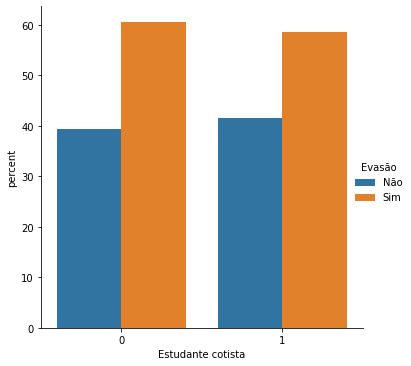

In [15]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

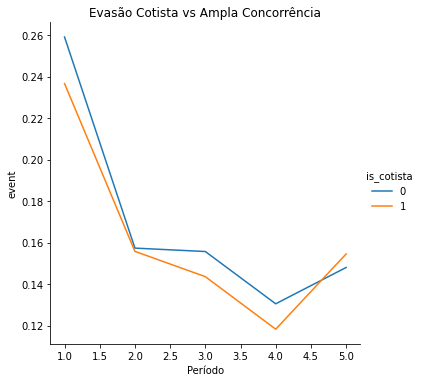

In [16]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

In [17]:
print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.002
0.0019955563810066415


# Q.7 A idade de ingresso afeta a taxa de evasão?

- A idade de ingresso não parece afetar a taxa de evasão

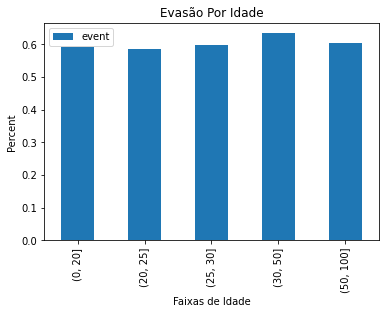

In [18]:
col = 'idade_cat'
df[col] = pd.cut(df.idade_ingresso, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

Idade Ingresso vs Turno


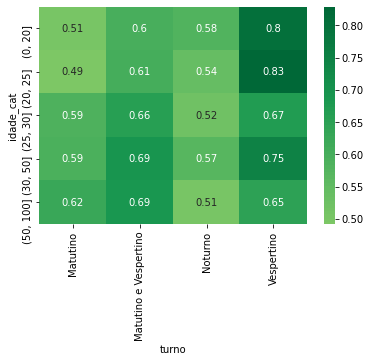

Idade Ingresso vs Grau do Curso


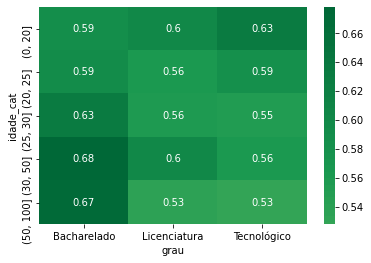

Idade Ingresso vs Sexo


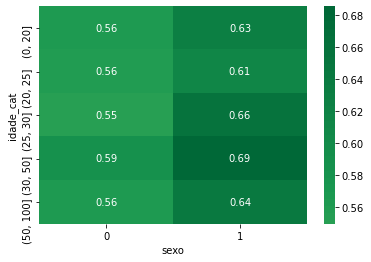

Idade Ingresso vs Cotista


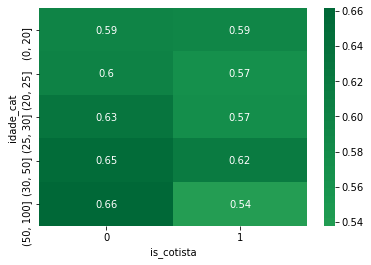

Idade Ingresso vs Migrante


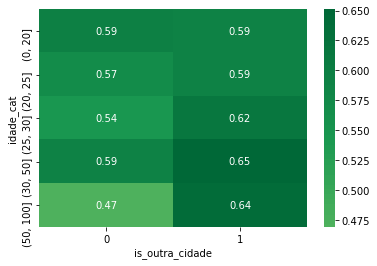

Idade Ingresso vs Período


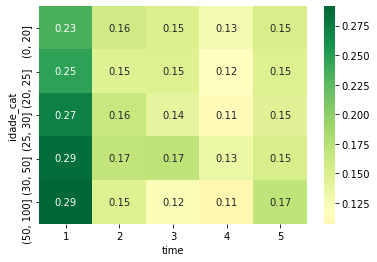

Turno vs Grau do Curso


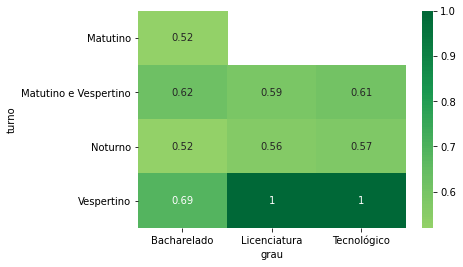

Turno vs Sexo


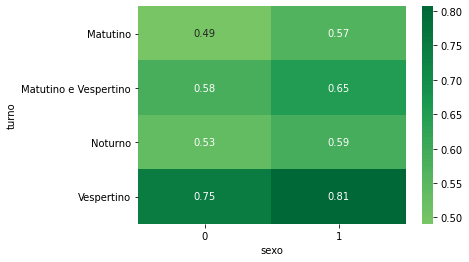

Turno vs Cotista


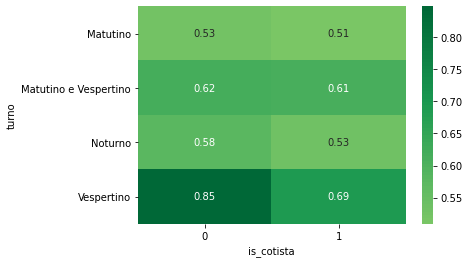

Turno vs Migrante


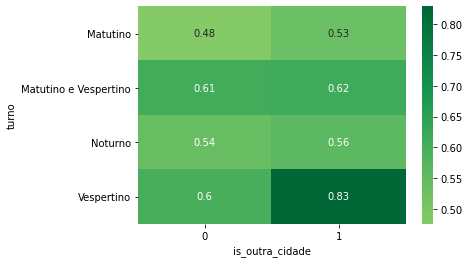

Turno vs Período


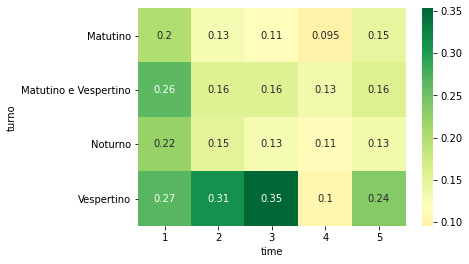

Grau do Curso vs Sexo


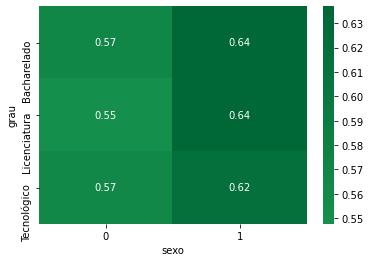

Grau do Curso vs Cotista


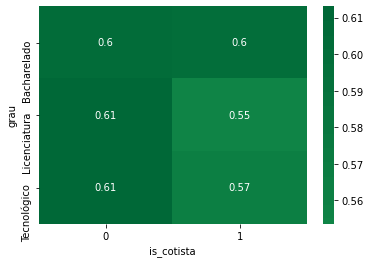

Grau do Curso vs Migrante


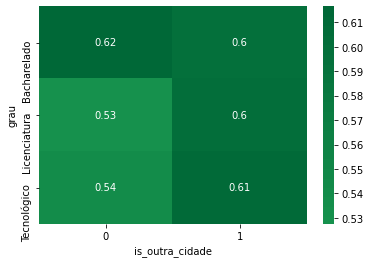

Grau do Curso vs Período


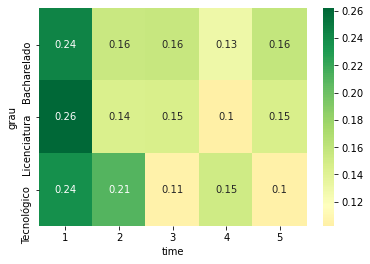

Sexo vs Cotista


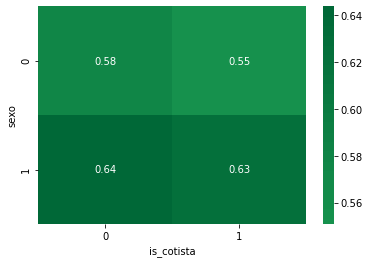

Sexo vs Migrante


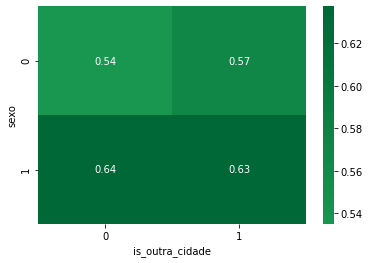

Sexo vs Período


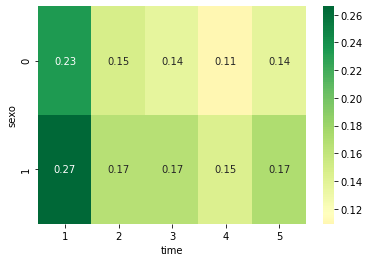

Cotista vs Migrante


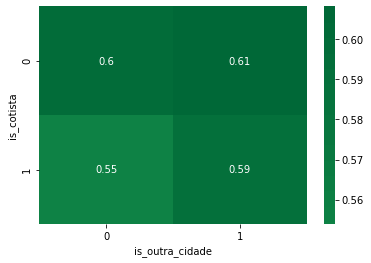

Cotista vs Período


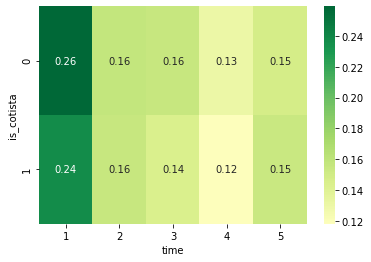

Migrante vs Período


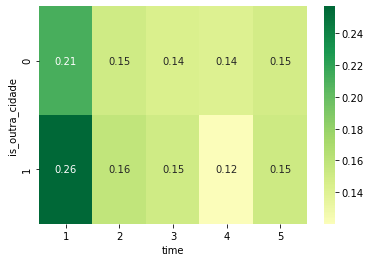

In [23]:
nomes = ['Idade Ingresso', 'Turno', 'Grau do Curso', 'Sexo', 'Cotista', 'Migrante', 'Período']
x = ['idade_cat', 'turno', 'grau', 'sexo', 'is_cotista',  'is_outra_cidade', 'time']

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


for i in range(0, len(x)):
    for j in range(i+1, len(x)):
        print('%s vs %s'%(nomes[i], nomes[j]))
        if x[j] == 'time':
            result = pd.pivot_table(data=df, index=x[i], columns=x[j], values='event')
        else:
            result = pd.pivot_table(data=df[idx], index=x[i], columns=x[j], values='event')
        sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
        plt.show()


# Idade vs Sexo

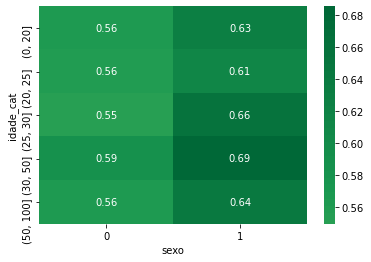

In [19]:

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='idade_cat', columns='sexo', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Idade vs Migrante

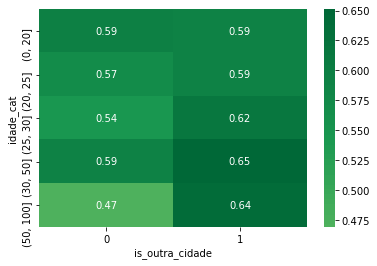

In [17]:

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='idade_cat', columns='is_outra_cidade', values='event')


sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Idade vs Semestre Ingresso

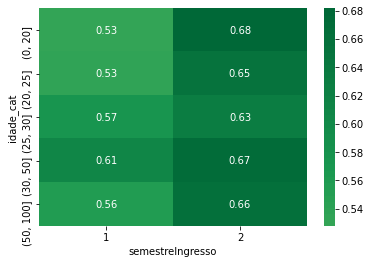

In [18]:

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='idade_cat', columns='semestreIngresso', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Idade vs Time

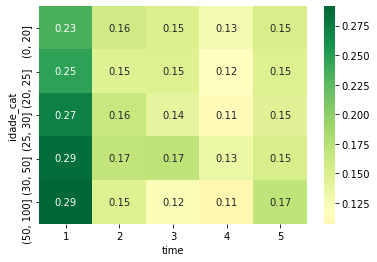

In [21]:

result = pd.pivot_table(data=df, index='idade_cat', columns='time', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Sexo vs Migrante

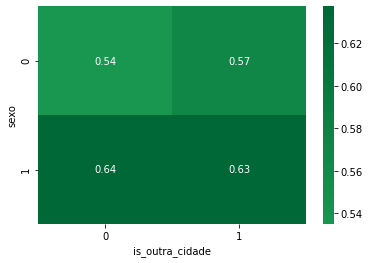

In [24]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='sexo', columns='is_outra_cidade', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Sexo vs Semestre de Ingresso

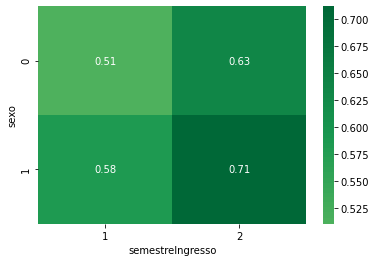

In [25]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='sexo', columns='semestreIngresso', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Sexo vs Time

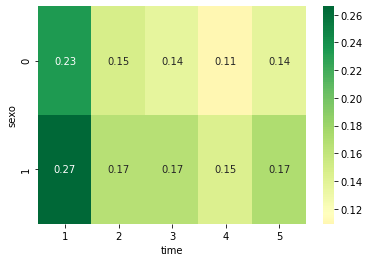

In [26]:
result = pd.pivot_table(data=df, index='sexo', columns='time', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Migrante vs Time

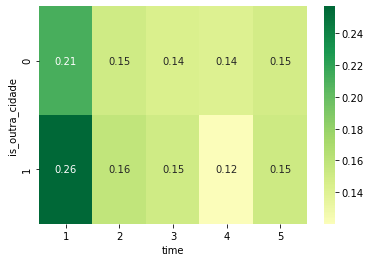

In [27]:
result = pd.pivot_table(data=df, index='is_outra_cidade', columns='time', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Migrante vs semestreIngresso

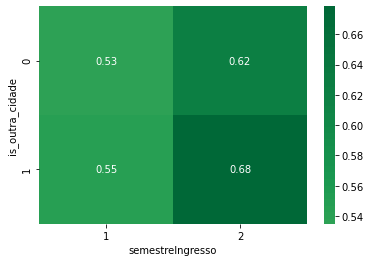

In [28]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='is_outra_cidade', columns='semestreIngresso', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# semestreIngresso vs Time

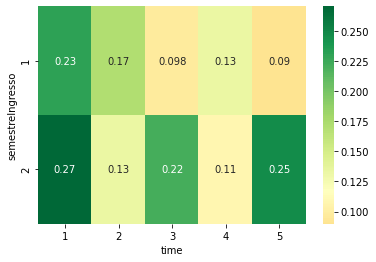

In [29]:
result = pd.pivot_table(data=df, index='semestreIngresso', columns='time', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

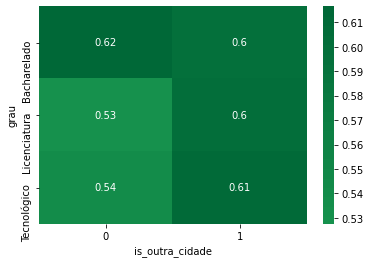

In [34]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

result = pd.pivot_table(data=df[idx], index='grau', columns='is_outra_cidade', values='event')

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

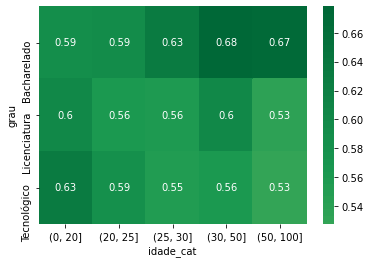

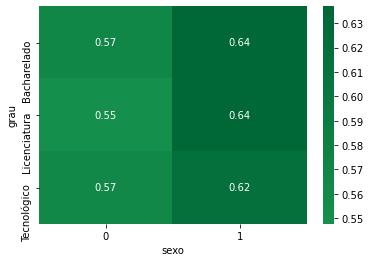

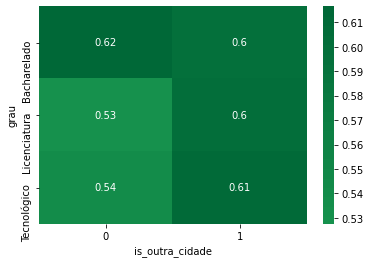

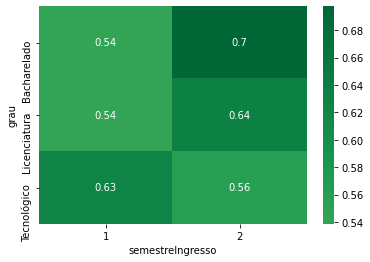

In [37]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

for c in ['idade_cat','sexo','is_outra_cidade','semestreIngresso']:
    result = pd.pivot_table(data=df[idx], index='grau', columns=c, values='event')

    sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
    plt.show()

# Turno afeta evasão?

In [7]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('turno').agg({'event':'mean'})

,event
turno,
Matutino,0.525797
Matutino e Vespertino,0.613443
Noturno,0.557080
Vespertino,0.771574


# Grau afeta evasão?

In [5]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('grau').agg({'event':'mean'})

,event
grau,
Bacharelado,0.601948
Licenciatura,0.582371
Tecnológico,0.589059


In [26]:
idx = df.turno == 'Vespertino'
df[idx]

,centro,codigoInep,turno,grau,sexo,is_cotista,idade,is_outra_cidade,idade_ingresso,matricula,...,ira,p_n_rep,p_n_repf,p_n_apr,p_n_tra,p_cum_rep,p_cum_repf,p_cum_apr,p_cum_tra,idade_cat
32407,CECULT,1272131,Vespertino,Bacharelado,1,1,18,1,18,9076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 20]"
32408,CECULT,1272131,Vespertino,Bacharelado,1,1,18,1,18,9076,...,6.850000,0.0,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.000000,"(0, 20]"
32409,CECULT,1272131,Vespertino,Bacharelado,1,1,19,1,18,9076,...,4.118182,0.0,0.833333,0.0,0.166667,0.0,0.416667,0.5,0.083333,"(0, 20]"
32414,CECULT,1272131,Vespertino,Bacharelado,1,1,21,0,21,9078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(20, 25]"
32415,CECULT,1272131,Vespertino,Bacharelado,1,1,21,0,21,9078,...,7.866667,0.0,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.000000,"(20, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68212,CECULT,1404699,Vespertino,Tecnológico,1,1,25,1,25,19364,...,8.700000,0.0,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.000000,"(20, 25]"
68220,CECULT,1385766,Vespertino,Licenciatura,1,1,33,1,33,19370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(30, 50]"
68221,CECULT,1385766,Vespertino,Licenciatura,1,1,33,1,33,19370,...,8.185714,0.0,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.000000,"(30, 50]"
68331,CECULT,1385766,Vespertino,Licenciatura,0,1,20,1,20,19429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 20]"
